<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/09/0910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install umap-learn[plot]

## Clustering iris and digits

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from scipy.cluster.hierarchy import linkage, fcluster

import umap
import umap.plot as uplot

plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-p

In [3]:
# Load iris dataset
iris = load_iris()

# Load iris dataset
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

numer_cols = iris_df.columns

# Load iris label
iris_df['label'] = iris['target_names'][iris['target']]

Text(0.5, 1.0, 'Scatterplot with true label')

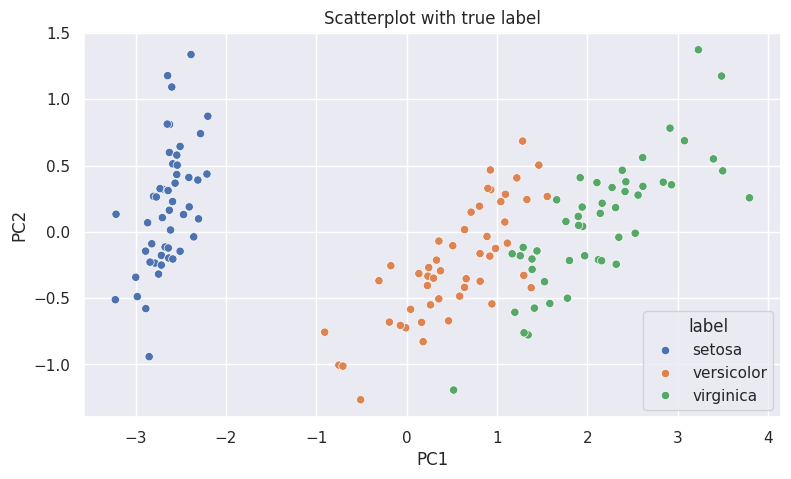

In [4]:
# Run PCA so we can show dataset in 2D space
pca = PCA(n_components=2)
pca_data = pca.fit_transform(iris_df[numer_cols].values)
pca_data = np.column_stack([pca_data, iris_df['label'].values])
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'label'])

# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

ARI : 0.5637510205230709


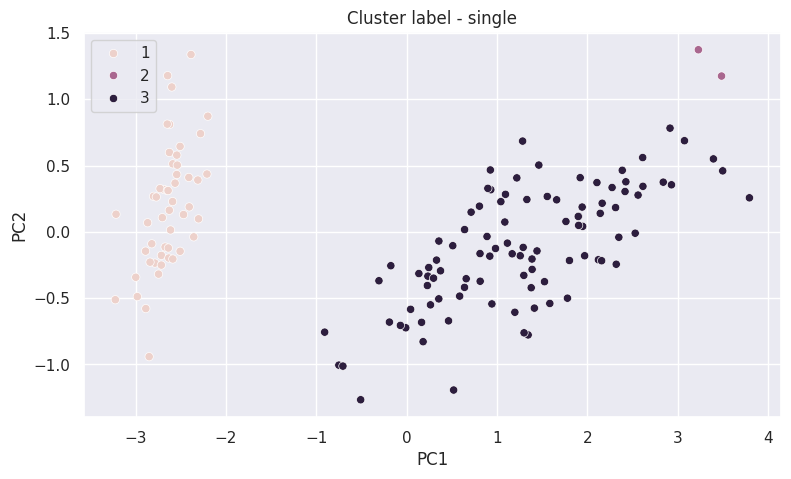

ARI : 0.6422512518362898


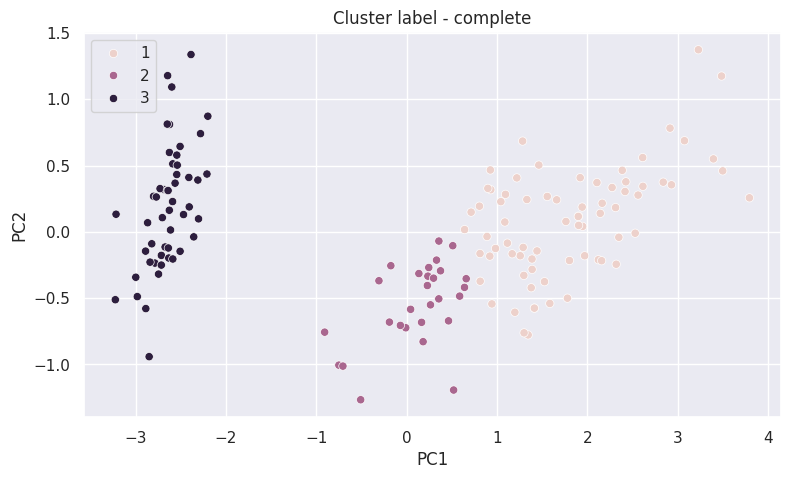

ARI : 0.7591987071071522


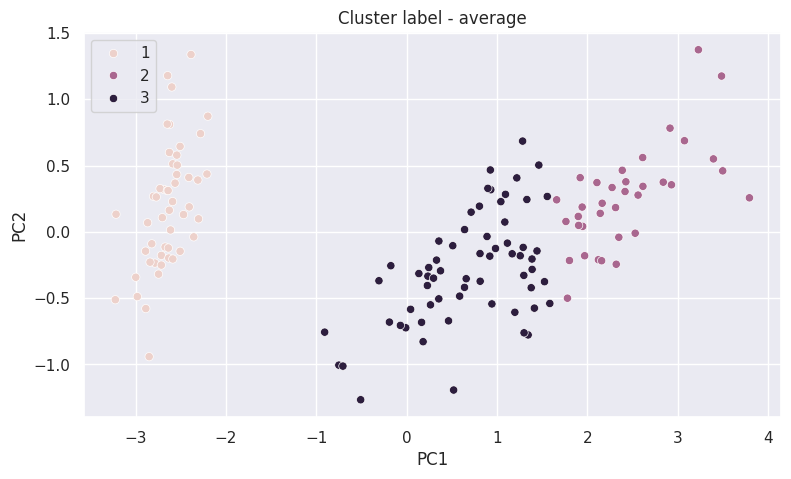

ARI : 0.7311985567707746


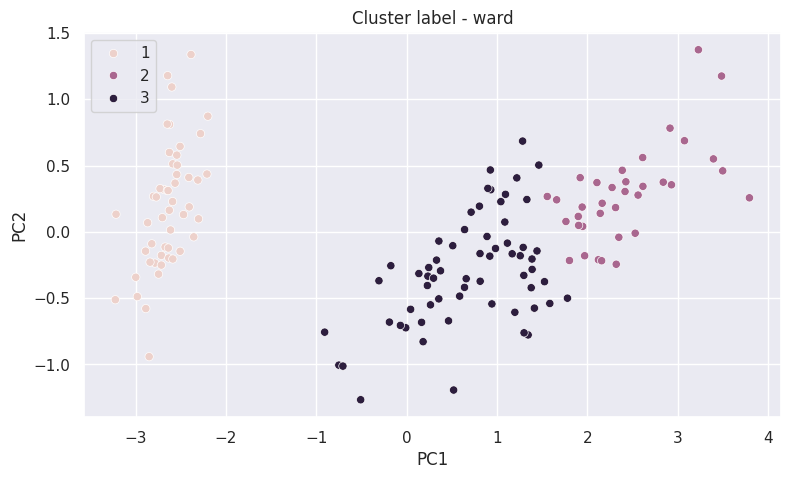

In [5]:
methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    linkage_matrix = linkage(iris_df[numer_cols], method=method)
    clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

    ari = adjusted_rand_score(
        iris_df['label'].to_numpy(),
        clusters
    )

    print('ARI : ' + str(ari))

    # Plot and colour based on reference label
    plt.figure()
    sns.scatterplot(pca_df, x='PC1', y='PC2', hue=clusters)
    plt.title('Cluster label - ' + method)
    plt.show()
# single: this type of behavior is a direct result of a chaining effect

## Digits dataset

In [6]:
# Load digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize digits data
digits_data = mnist.data/255
digit_labels = mnist.target

# Subset the dataset
digit_labels_df = pd.DataFrame(digit_labels)

label_subset_df = digit_labels_df.groupby('class').head(500)

digits_data = digits_data.loc[label_subset_df.index, :].reset_index(drop=True)
digit_labels = label_subset_df['class'].to_numpy()

<Axes: >

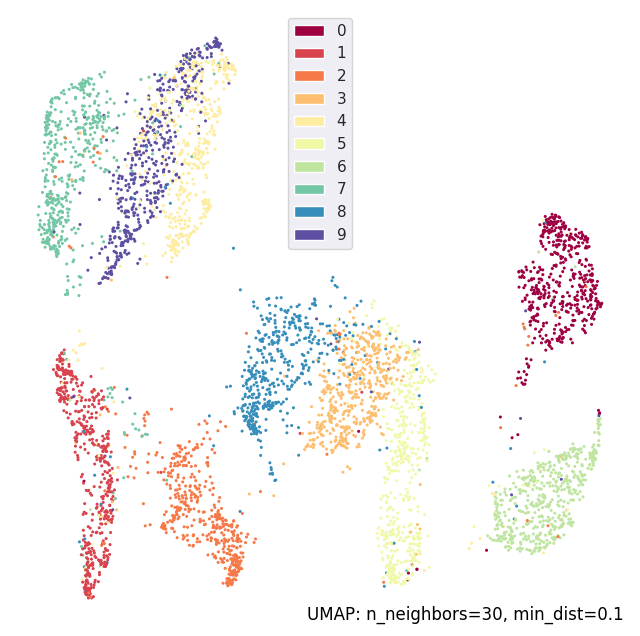

In [7]:
# Embed dataset
mnist_umap = umap.UMAP(n_neighbors=30)
embedding = mnist_umap.fit_transform(digits_data)

# Plot 2D embedding
uplot.points(mnist_umap, labels=digit_labels)

ARI = 7.249519851737537e-08


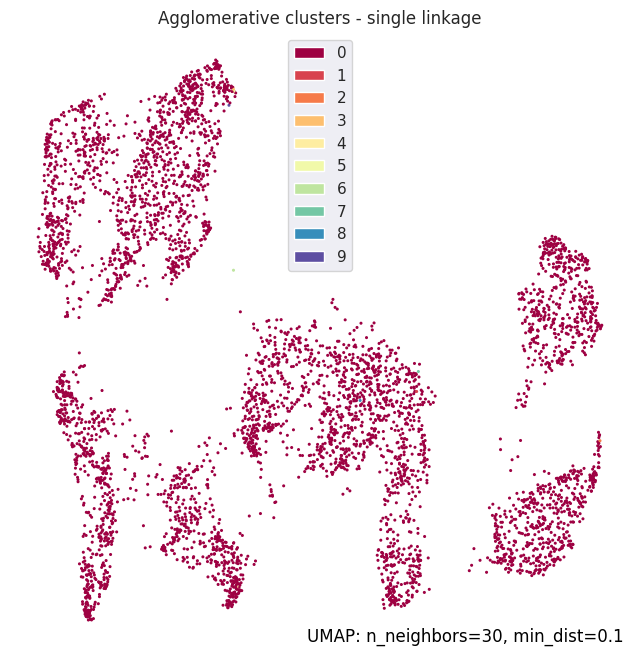

In [8]:
# Perform hierarchical clustering for single linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='single',
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - single linkage')
# the majority of data points belong to a single cluster, which is a direct result of a chaining effect

ARI = 0.15777822431598285


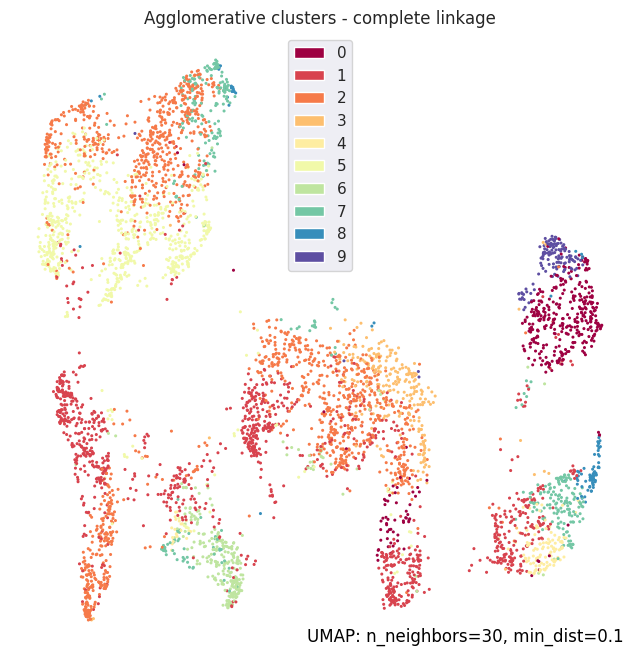

In [9]:
# Perform hierarchical clustering with complete linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='complete'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - complete linkage')

ARI = 0.04417339487518105


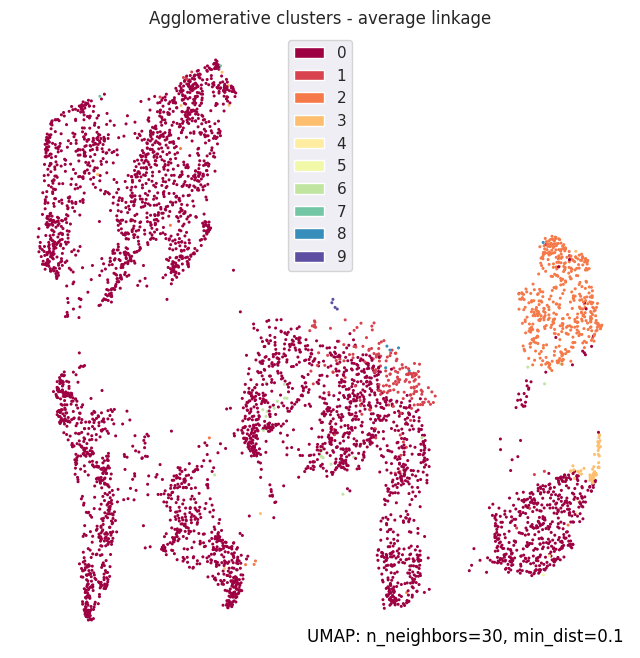

In [10]:
# Perform hierarchical clustering with average linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='average'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - average linkage')
# we have the chaining effect here, which can happen with the average linkage when the data is very noisy

ARI = 0.5016084210255642


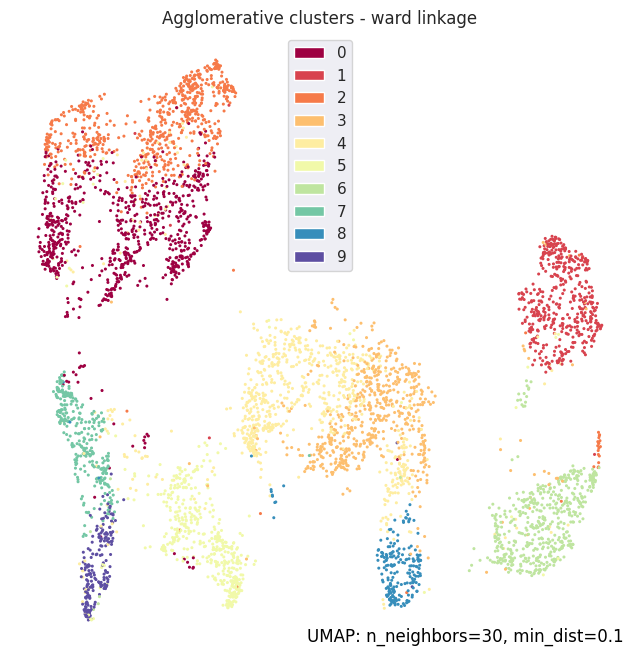

In [11]:
# Perform hierarchical clustering with ward linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='ward'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - ward linkage')